In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/last-5yrs-cases-merged/cases_last_5yrs.csv
/kaggle/input/last-5yrs-cases-merged/__results__.html
/kaggle/input/last-5yrs-cases-merged/__notebook__.ipynb
/kaggle/input/last-5yrs-cases-merged/__output__.json
/kaggle/input/last-5yrs-cases-merged/custom.css
/kaggle/input/court-data/judges_clean/judges_clean.csv
/kaggle/input/court-data/acts_sections/acts_sections.csv
/kaggle/input/court-data/cases/cases/cases_2015.csv
/kaggle/input/court-data/cases/cases/cases_2012.csv
/kaggle/input/court-data/cases/cases/cases_2018.csv
/kaggle/input/court-data/cases/cases/cases_2013.csv
/kaggle/input/court-data/cases/cases/cases_2017.csv
/kaggle/input/court-data/cases/cases/cases_2010.csv
/kaggle/input/court-data/cases/cases/cases_2014.csv
/kaggle/input/court-data/cases/cases/cases_2016.csv
/kaggle/input/court-data/cases/cases/cases_2011.csv
/kaggle/input/court-data/keys/keys/type_name_key.csv
/kaggle/input/court-data/keys/keys/cases_district_key.csv
/kaggle/input/court-data/keys/keys/act_ke

### *Reading 'cases_last_5yrs.csv' into a dataFrame*
##### *'cases_last_5yrs.csv' is a .csv file created in another notebook*

In [2]:
last_5yrs_cases = pd.read_csv("/kaggle/input/last-5yrs-cases-merged/cases_last_5yrs.csv")
last_5yrs_cases

,Unnamed: 0,ddl_case_id,year,state_code,judge_position,disp_name,date_of_filing,date_of_decision
0,0,01-01-01-201908000022014,2014,1,chief judicial magistrate,25,2014-01-03,2014-10-28
1,1,01-01-01-201908000032014,2014,1,chief judicial magistrate,25,2014-01-01,2015-08-10
2,2,01-01-01-201908000052014,2014,1,chief judicial magistrate,25,2014-01-02,2014-06-10
3,3,01-01-01-201908000062014,2014,1,chief judicial magistrate,22,2014-01-04,2016-11-14
4,4,01-01-01-201908000072014,2014,1,chief judicial magistrate,25,2014-01-04,2014-01-04
...,...,...,...,...,...,...,...,...
57489559,57489559,33-02-03-224600000062018,2018,33,chief judicial magistrate,25,2018-07-26,2018-09-12
57489560,57489560,33-02-03-224600000072018,2018,33,chief judicial magistrate,25,2018-08-25,2019-03-23
57489561,57489561,33-02-03-224600000082018,2018,33,chief judicial magistrate,25,2018-09-06,2019-03-28
57489562,57489562,33-02-03-224600000092018,2018,33,chief judicial magistrate,25,2018-09-14,2019-09-21


### *Number of cases per year*

In [3]:
df1 = pd.pivot_table(last_5yrs_cases, index=['year'], values='ddl_case_id', aggfunc=['count'])
df1

,count
,ddl_case_id
year,
2014,8874616
2015,10475876
2016,11349260
2017,13065513
2018,13724299


## *Line graph to show the year wise trend of number of cases*

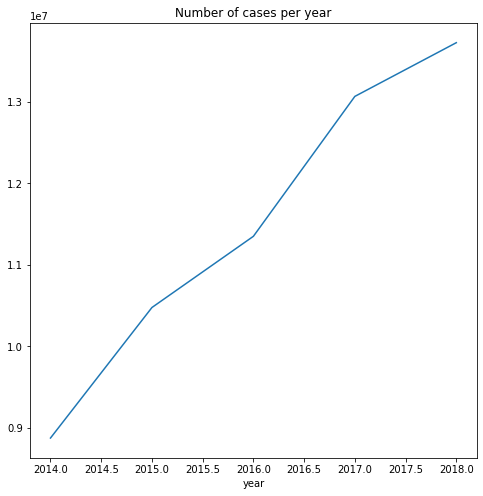

In [4]:
plot = df1.plot.line(figsize=(8, 8), title='Number of cases per year', legend=None)
fig = plot.get_figure()
fig.savefig("/kaggle/working/num_cases_year_wise.jpg")

### *Number of cases per district*

In [5]:
state_wise = pd.DataFrame().assign(year=last_5yrs_cases['year'], state_code=last_5yrs_cases['state_code'], ddl_case_id=last_5yrs_cases['ddl_case_id'])
state_wise

,year,state_code,ddl_case_id
0,2014,1,01-01-01-201908000022014
1,2014,1,01-01-01-201908000032014
2,2014,1,01-01-01-201908000052014
3,2014,1,01-01-01-201908000062014
4,2014,1,01-01-01-201908000072014
...,...,...,...
57489559,2018,33,33-02-03-224600000062018
57489560,2018,33,33-02-03-224600000072018
57489561,2018,33,33-02-03-224600000082018
57489562,2018,33,33-02-03-224600000092018


### *Reading 'cases_state_key.csv' into a dataFrame*

In [6]:
state=pd.read_csv("/kaggle/input/court-data/keys/keys/cases_state_key.csv")
state.drop(columns=['year', 'pc11_state_name', 'pc11_state_id'],inplace=True)
state.drop_duplicates(inplace=True, ignore_index=True)
state

,state_code,state_name
0,2,Andhra Pradesh
1,29,Telangana
2,6,Assam
3,8,Bihar
4,27,Chandigarh
5,18,Chhattisgarh
6,32,DNH at Silvasa
7,31,Diu and Daman
8,30,Goa
9,17,Gujarat


*merging the two dataFrames 'state_wise' and 'state'*

In [7]:
state_wise = pd.merge(state_wise, state, how='left', on='state_code')
state_wise.drop(columns=['state_code'], inplace=True)
state_wise

,year,ddl_case_id,state_name
0,2014,01-01-01-201908000022014,Maharashtra
1,2014,01-01-01-201908000032014,Maharashtra
2,2014,01-01-01-201908000052014,Maharashtra
3,2014,01-01-01-201908000062014,Maharashtra
4,2014,01-01-01-201908000072014,Maharashtra
...,...,...,...
57489559,2018,33-02-03-224600000062018,Ladakh
57489560,2018,33-02-03-224600000072018,Ladakh
57489561,2018,33-02-03-224600000082018,Ladakh
57489562,2018,33-02-03-224600000092018,Ladakh


In [8]:
df2 = pd.pivot_table(state_wise, index=['year','state_name'], values='ddl_case_id', aggfunc=['count'])
df2

count
                    ddl_case_id
year state_name                
2014 Andhra Pradesh      246828
     Assam               131610
     Bihar               355055
     Chandigarh           27899
     Chhattisgarh        131190
...                         ...
2018 Telangana           236422
     Tripura              12430
     Uttar Pradesh      2550912
     Uttarakhand         151216
     West Bengal         473084

[160 rows x 1 columns]

## *Year wise and state wise count of cases*

In [9]:
df3 = pd.pivot_table(state_wise, columns=['state_name'], index=['year'], values='ddl_case_id', aggfunc='count')
df3

state_name,Andhra Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,DNH at Silvasa,Delhi,Diu and Daman,Goa,Gujarat,...,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
year,,,,,,,,,,,,,,,,,,,,,
2014,246828,131610,355055,27899,131190,1069,172409,990,33592,633923,...,164049,374592,447139,4911,401418,183129,13701,1167900,105319,254380
2015,269049,155744,378305,29257,162186,1261,209976,1581,40025,658015,...,192927,413919,585688,4732,461290,195023,12127,1721962,87826,381017
2016,273082,155943,389051,29782,179927,1006,308537,1589,31481,735394,...,229001,442910,559176,5075,505604,204123,13772,2076121,92937,353949
2017,309346,214503,479259,33211,192181,903,387146,1558,32446,768727,...,299934,563399,913171,4561,624243,228752,12566,2391896,118039,444120
2018,317917,212765,612675,35242,217706,1298,403869,1644,39453,765934,...,256311,573146,865734,4078,658724,236422,12430,2550912,151216,473084


## *Line graph dipicting the year wise trend of number of cases for each state*

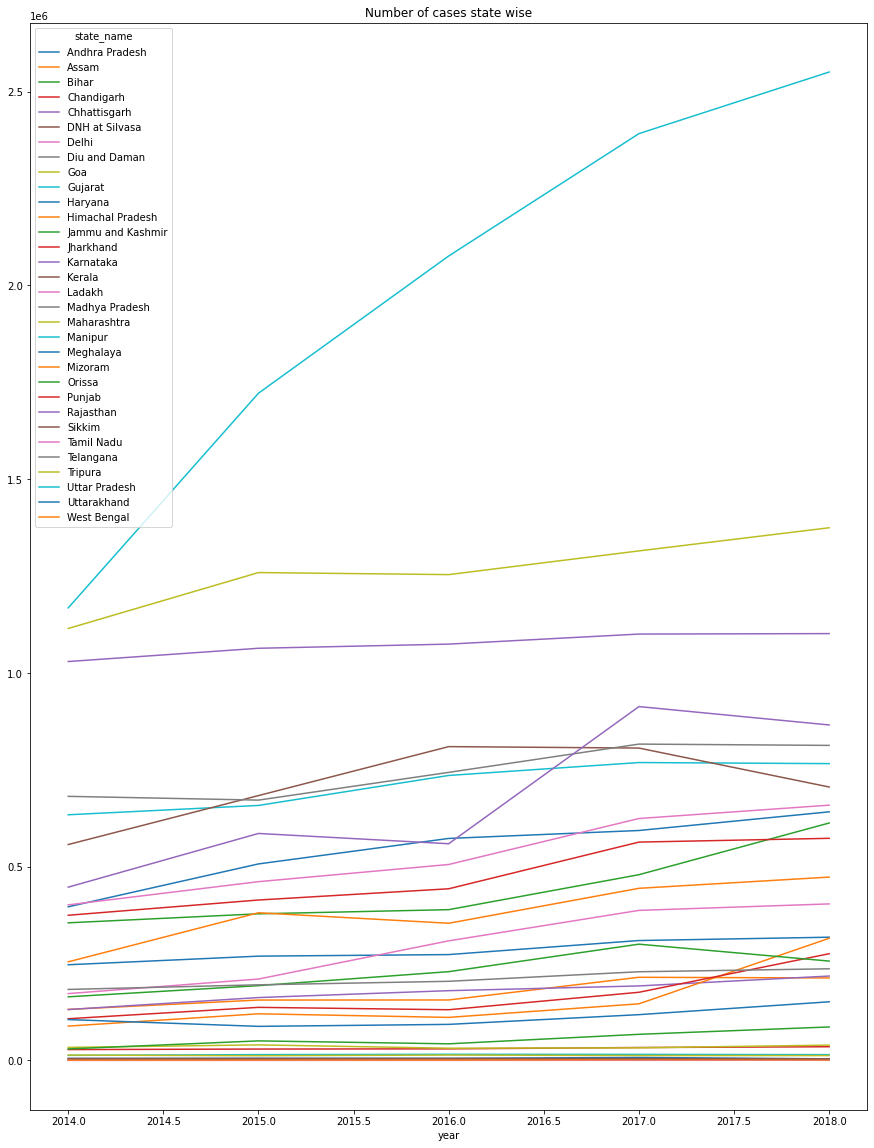

In [10]:
plot = df3.plot.line(figsize=(15, 20), title='Number of cases state wise')
fig = plot.get_figure()
fig.savefig("/kaggle/working/num_cases_year_state_wise.jpg")